# <img style="float: left; padding-right: 10px; width: 45px" src="iacs.png"> S-109A Introduction to Data Science: 

## Homework 2: Linear and k-NN Regression


**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader

<hr style="height:2pt">


### INSTRUCTIONS

- To submit your assignment follow the instructions given in canvas.
- Restart the kernel and run the whole notebook again before you submit. 
- If you submit individually and you have worked with someone, please include the name of your [one] partner below. 

Names of people you have worked with goes here: 



 Nathan Goldberg

<hr style="height:2pt">

In [3]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.api import OLS
%matplotlib inline

<div class="theme"> Main Theme: Predicting Taxi Pickups in NYC </div>

In this homework, we will explore k-nearest neighbor and linear regression methods for predicting a quantitative variable. Specifically, we will build regression models that can predict the number of taxi pickups in New York city at any given time of the day. These prediction models will be useful, for example, in monitoring traffic in the city.

The data set for this problem is given in the file `dataset_1.csv`.  You will need to separate it into training and test sets. The first column contains the time of a day in minutes, and the second column contains the number of pickups observed at that time. The data set covers taxi pickups recorded in NYC during Jan 2015.

We will fit regression models that use the time of the day (in minutes) as a predictor and predict the average number of taxi pickups at that time. The models will be fitted to the training set and  evaluated on the test set. The performance of the models will be evaluated using the $R^2$ metric.

<div class="exercise"> <b> Question 1 [10 pts]</b> </div>

**1.1**. Use pandas to load the dataset from the csv file `dataset_1.csv` into a pandas data frame.  Use the `train_test_split` method from `sklearn` with a `random_state` of 42 and a `test_size` of 0.2 to split the dataset into training and test sets.  Store your train set dataframe in the variable `train_data`.  Store your test set dataframe in the variable `test_data`.


**1.2**. Generate a scatter plot of the training data points with well-chosen labels on the x and y axes. The time of the day should be on the x-axis and the number of taxi pickups on the y-axis.  Make sure to title your plot.

**1.3**. Does the pattern of taxi pickups make intuitive sense to you? 


### Answers

**1.1**

In [5]:
# load dataset_1.csv
df = pd.read_csv("dataset_1.csv")

# split dataset into training and test sets
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

**1.2**

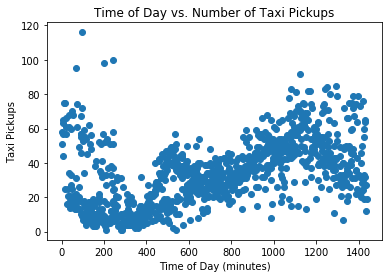

In [6]:
plt.scatter(train_data.TimeMin, train_data.PickupCount)
plt.xlabel('Time of Day (minutes)')
plt.ylabel('Taxi Pickups')
plt.title('Time of Day vs. Number of Taxi Pickups')

**1.3**

**Does the pattern of taxi pickups make intuitive sense to you?**

   [Answer here]

<div class="exercise"> <b>Question 2 [20 pts]</b> </div>

In lecture we've seen k-Nearest Neighbors (k-NN) Regression, a non-parametric regression technique.  In the following problems please use built-in functionality from `sklearn` to run k-NN Regression. 


**2.1**. Choose `TimeMin` as your predictor variable (aka, feature) and `PickupCount` as your response variable.  Create a dictionary of `KNeighborsRegressor` objects and call it `KNNModels`.  Let the key for your `KNNmodels` dictionary be the value of $k$ and the value be the corresponding `KNeighborsRegressor` object. For $k \in \{1, 10, 75, 250, 500, 750, 1000\}$, fit k-NN regressor models on the training set (`train_data`). 

**2.2**.  For each $k$ on the training set, overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` with a scatter plot of predicted `PickupCount` vs `TimeMin`.  Do the same for the test set.  You should have one figure with 2 x 7 total subplots; for each $k$ the figure should have two subplots, one subplot for the training set and one for the test set. 

**Hints**:
1. In each subplot, use two different colors and/or markers to distinguish k-NN regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**2.3**. Report the $R^2$ score for the fitted models on both the training and test sets for each $k$.

**Hints**:
1. Reporting the $R^2$ values in tabular form is encouraged.
2. You should order your reported $R^2$ values by $k$.

**2.4**. Plot the $R^2$ values from the model on the training and test set as a function of $k$ on the same figure.  

**Hints**:
1. Again, the figure must have axis labels and a legend.
2. Differentiate $R^2$ visualization on the training and test set by color and/or marker.
3. Make sure the $k$ values are sorted before making your plot.

**2.5**. Discuss the results:

1. If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?  
2. What does an $R^2$ score of $0$ mean?  
3. What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?
4. Do the training and test $R^2$ plots exhibit different trends?  Describe.  
5. How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?
6. What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?

### Answers

**2.1**

In [7]:
regdict = {}

# Reshape to be a 2D array
x_train = train_data.TimeMin.values.reshape(train_data.TimeMin.shape[0], 1)
y_train = train_data.PickupCount.values.reshape(train_data.PickupCount.shape[0], 1)

ks = [1, 10, 75, 250, 500, 750, 1000]

# Perform KNN regressions
for k in ks:
    knnreg = KNeighborsRegressor(n_neighbors=k)
    knnreg.fit(x_train, y_train)
    regdict[k] = knnreg # Store the regressors in a dictionary

**2.2**

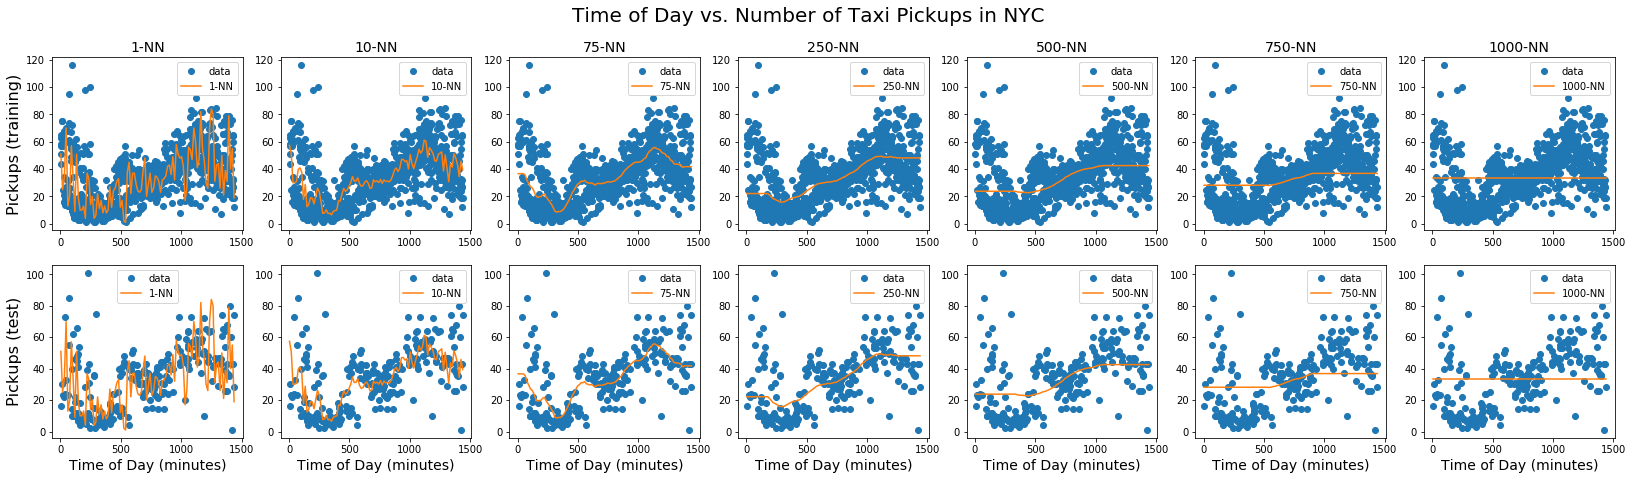

In [101]:
## Code for your plot here

fig, axes = plt.subplots(2,7, figsize=(28,7))

xgrid = np.linspace(np.min(x_train), np.max(x_train), 100)

for i in range(0,2):
    for j in range(0,7):
        
        if i==0: 
            axes[i,j].plot(x_train, y_train, 'o', label='data')
            axes[i,j].set_title('{}-NN'.format(ks[j]), fontsize=14)
            if j==0:
                axes[i,j].set_ylabel('Pickups (training)', fontsize = 16)
            
        else: 
            if j==0:
                axes[i,j].set_ylabel('Pickups (test)', fontsize=16)
            
            axes[i,j].plot(test_data.TimeMin, test_data.PickupCount, 'o', label='data')
            axes[i,j].set_xlabel('Time of Day (minutes)', fontsize=14)
            
        predictions = regdict[ks[j]].predict(xgrid.reshape(100,1))
        axes[i,j].plot(xgrid, predictions, label="{}-NN".format(ks[j]), linewidth=1.5)             
        
        
        axes[i,j].legend()    

fig.suptitle('Time of Day vs. Number of Taxi Pickups in NYC', fontsize=20)

**2.3**

In [26]:
## Code here

# Reshape to be a 2D array
x_test = test_data.TimeMin.values.reshape(test_data.TimeMin.shape[0], 1)
y_test = test_data.PickupCount.values.reshape(test_data.PickupCount.shape[0], 1)

# list of R^2s
scores_train = [0] * 7
scores_test = [0] * 7

# for each k
for i in range(0,7):
    knnreg = KNeighborsRegressor(n_neighbors=ks[i])
    knnreg.fit(x_train, y_train)
    
    # store R^2
    scores_train[i] = knnreg.score(x_train, y_train)
    scores_test[i] = knnreg.score(x_test, y_test)
    
# create data frame of R^2s
R_Squareds = pd.DataFrame({'k': ks, 'R2_train': scores_train, 'R2_test': scores_test})

# reorganize columns
R_Squareds = R_Squareds[['k', 'R2_train', 'R2_test']]

R_Squareds

,k,R2_train,R2_test
0,1,0.712336,-0.418932
1,10,0.509825,0.272068
2,75,0.445392,0.390310
3,250,0.355314,0.340341
4,500,0.290327,0.270321
5,750,0.179434,0.164909
6,1000,0.000000,-0.000384


**2.4**

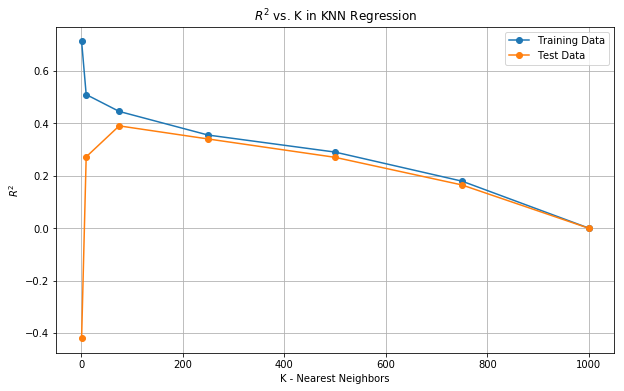

In [164]:
## Code for your plot here

fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.plot(ks, scores_train, marker='o', label="Training Data")
ax.plot(ks, scores_test, marker='o', label="Test Data")
ax.set_xlabel('K - Nearest Neighbors')
ax.set_ylabel('$R^2$')
ax.set_title('$R^2$ vs. K in KNN Regression')
ax.legend()
ax.grid(True)

**2.5**

**Discuss the results**


1. *If $n$ is the number of observations in the training set, what can you say about a k-NN regression model that uses $k = n$?*  

    This regression model would be a horizontal line at the mean of the y-coordinates of all the data points. It's $R^2$ would be $0$.
    
2. *What does an $R^2$ score of $0$ mean?*

    An $R^2$ of $0$ indicates that the given model is equally good at predicting the response variable as the mean of the data is.

3. *What would a negative $R^2$ score mean?  Are any of the calculated $R^2$ you observe negative?*

    A negative $R^2$ indicates that the given model is worse at predicting the response variable than the mean is.
       
4. *Do the training and test $R^2$ plots exhibit different trends?  Describe.*  

    At small $k$ values, the two plots exhibit very different trends. This is because low $k$ values can produce very volatile models, which can lead to extreme errors in test cases. However, as the value of $k$ increases, the difference in $R^2$'s decreases because the regression model approaches the mean, which drives the $R^2$ to $0$. 
        
5. *How does the value of $k$ affect the fitted model and in particular the training and test $R^2$ values?*

    Low k-values can produce very volatile models, which yields a high $R^2$ in the fitted model but can lead to extreme errors in test cases. High $k$ values produce a more modest $R^2$ in the fitted model, but also yield more modest errors in test cases.
    
6. *What is the best value of $k$ and what are the corresponding training/test set $R^2$ values?*

    According to the above plot, out of the prescribed $k$ values, $k = 75$ appears to be optimal because it maximizes $R^2$ in th test case. In the training set, $k=75$ yields an $R^2$ of $.445$. In the test set, the model's $R^2$ is $.390$.
    

<div class="exercise"> <b> Question 3  [20 pts] </b></div>

We next consider simple linear regression for the same train-test data sets, which we know from lecture is a parametric approach for regression that assumes that the response variable has a linear relationship with the predictor.  Use the `statsmodels` module for Linear Regression. This module has built-in functions to summarize the results of regression and to compute confidence intervals for estimated regression parameters.  

**3.1**. Again choose `TimeMin` as your predictor variable and `PickupCount` as your response variable.  Create a `OLS` class instance and use it to fit a Linear Regression model on the training set (`train_data`).  Store your fitted model in the variable `OLSModel`.

**3.2**. Re-create your plot from 2.2 using the predictions from `OLSModel` on the training and test set. You should have one figure with two subplots, one subplot for the training set and one for the test set.

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)


**3.3**. Report the $R^2$ score for the fitted model on both the training and test sets.  You may notice something peculiar about how they compare.

**3.4**. Report the slope and intercept values for the fitted linear model.  

**3.5**. Report the $95\%$ confidence interval for the slope and intercept.

**3.6**. Create a scatter plot of the residuals ($e = y - \hat{y}$) of the linear regression model on the training set as a function of the predictor variable (i.e. `TimeMin`). Place on your plot a horizontal line denoting the constant zero residual.  

**3.7**. Discuss the results:

1. How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?
2. What does the sign of the slope of the fitted linear model convey about the data?  
3. Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?  
4. Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.  
5. Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.

### Answers

**3.1**

In [48]:
# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(x_train)

# build the OLS model (ordinary least squares) from the training data
regr_sm = sm.OLS(y_train, X)

# do the fit and save regression info (parameters, etc)
OLSModel = regr_sm.fit()

# pull the beta parameters out from OLSModel
beta0_sm = OLSModel.params[0]
beta1_sm = OLSModel.params[1]

print("(beta0, beta1) = (%f, %f)" %(beta0_sm, beta1_sm))


(beta0, beta1) = (16.750601, 0.023335)


**3.2**

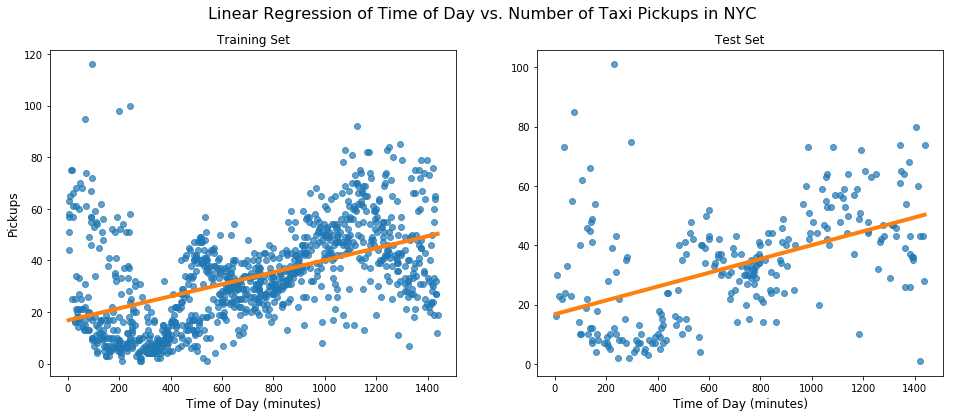

In [90]:
fig, axes = plt.subplots(1,2, figsize=(16,6))

x = np.linspace(np.min(x_train), np.max(x_train), 100)

axes[0].plot(x_train, y_train, 'o', label='data', alpha=0.7)
axes[1].plot(x_test, y_test, 'o', label='data', alpha=0.7)

axes[0].plot(x, beta0_sm + beta1_sm * x, linewidth=4)
axes[1].plot(x, beta0_sm + beta1_sm * x, linewidth=4)

axes[0].set_ylabel('Pickups', fontsize=12)

axes[0].set_xlabel('Time of Day (minutes)', fontsize=12)
axes[1].set_xlabel('Time of Day (minutes)', fontsize=12)

axes[0].set_title('Training Set')
axes[1].set_title('Test Set')

fig.suptitle('Linear Regression of Time of Day vs. Number of Taxi Pickups in NYC', fontsize=16)
#statsmodels.graphics.regressionplots.abline_plot(model_results=OLSModel, ax=axes[0])

#predictions = regdict[ks[j]].predict(xgrid.reshape(100,1))
#        axes[i,j].plot(xgrid, predictions, label="{}-NN".format(ks[j]))


**3.3**

In [ ]:
## Code here




**3.4**

In [ ]:
## Code here



**3.5**

In [ ]:
## Code here



**3.6**

In [ ]:
## Code here




**3.7**

**Discuss the results**

1. *How does the test $R^2$ score compare with the best test $R^2$ value obtained with k-NN regression?*

    [Answer here]

2. *What does the sign of the slope of the fitted linear model convey about the data?* 

    [Answer here]

3. *Based on the $95\%$ confidence interval, do you consider the estimates of the model parameters to be reliable?*  
    
    [Answer here]

4. *Do you expect a $99\%$ confidence interval for the slope and intercept to be tighter or looser than the $95\%$ confidence intervals? Briefly explain your answer.*  

    [Answer here]

5. *Based on the residuals plot that you made, discuss whether or not the assumption of linearity is valid for this data.*

    [Answer here]


<div class="exercise">  <b> Question 4 [20 pts]: Roll Up Your Sleeves Show Some Class </b> </div>

We've seen Simple Linear Regression in action and we hope that you're convinced it works.  In lecture we've thought about the mathematical basis for Simple Linear Regression.  There's no reason that we can't take advantage of our knowledge to create our own implementation of Simple Linear Regression.  We'll provide a bit of a boost by giving you some basic infrastructure to use.  In the last problem, you should have heavily taken advantage of the `statsmodels` module.  In this problem we're going to build our own machinery for creating Linear Regression models and in doing so we'll follow the `statsmodels` API pretty closely.  Because we're following the `statmodels` API, we'll need to use python classes to create our implementation.  If you're not familiar with python classes don't be alarmed.  Just implement the requested functions/methods in the CS109OLS class that we've given you below and everything should just work.  If you have any questions, ask the teaching staff.

**4.1**. Implement the `fit` and `predict` methods in the CS109OLS class we've given you below as well as the `CS109r2score` function that we've provided outside the class.

**Hints**:

1. `fit` should take the provided numpy arrays `endog` and `exog` and use the normal equations to calculate the optimal linear regression coefficients.  Store those coefficients in self.params
2. In `fit` you'll need to calculate an inverse.  Use np.linalg.pinv
3. `predict` should use the numpy array stored in self.exog and calculate an np.array of predicted values.
4. `CS109r2score` should take the true values of the response variable `y_true` and the predicted values of the response variable `y_pred` and calculate and return the $R^2$ score. 
5.  To replicate the statsmodel API your code should be able to be called as follows:
    ```python
    mymodel = CS109OLS(y_data, augmented_x_data)
    mymodel.fit()
    predictions = mymodel.predict()
    R2score = CS109r2score(true_values, predictions)
    ```

**4.2**. As in 3.1 create a `CS109OLS` class instance and  fit a Linear Regression model on the training set (`train_data`).  Store your model in the variable `CS109OLSModel`.  Remember that as with sm.OLS your class should assume you want to fit an intercept as part of your linear model (so you may need to add a constant column to your predictors).

**4.3**  As in 3.2 Overlay a scatter plot of the actual values of `PickupCount` vs. `TimeMin` on the training set with a scatter plot of `PickupCount` vs predictions of `TimeMin` from your `CS109OLSModel` Linear Regression model on the training set.  Do the same for the test set.  You should have one figure with two subplots, one subplot for the training set and one for the test set.  How does your figure compare to that in 3.2?

**Hints**:
1. Each subplot should use different color and/or markers to distinguish Linear Regression prediction values from that of the actual data values.
2. Each subplot must have appropriate axis labels, title, and legend.
3. The overall figure should have a title.  (use `suptitle`)

**4.4**. As in 3.3, report the $R^2$ score for the fitted model on both the training and test sets using your `CS109OLSModel`.  Make sure to use the `CS109r2score` that you created.  How do the results compare to the the scores in 3.3?

**4.5**. as in 3.4, report the slope and intercept values for the fitted linear model your `CS109OLSModel`.   How do the results compare to the the values in 3.4?




### Answers

**4.1**

In [94]:
class CS109OLS(object):
    
    def __init__(self, endog = [], exog = []):
        
        ## Make sure you initialize self.params
        self.params = []
              
        ## store exog and endog in instance variables
        self.endog = np.array(endog)
        self.exog = np.array(exog)
  
                    
    def fit(self):
        
        #################
        # Your Code below
        #################
        
        # do something with self.exog and self.endog to calculate 
        # your linear regression coefficients
        # store the result in self.params
        
        # check input array shapes
        if len(self.exog.shape) < 2:
            print('WARNING: Reshaping features array.')
            self.exog = self.exog.reshape(self.exog.shape[0], 1)
            
        if len(self.endog.shape) < 2:
            print('WARNING: Reshaping observations array.')
            self.endog = self.endog.reshape(self.endog.shape[0], 1)
        
        # compute means
        x_bar = np.mean(self.exog)
        y_bar = np.mean(self.endog)
        
        # build the two terms
        numerator = np.mean((self.exog - x_bar)*(self.endog - y_bar))
        denominator = np.mean((self.exog - x_bar)**2)
        
        # slope = beta1
        beta_1 = numerator/denominator
        
        # intercept = beta0
        beta_0 = y_bar - beta_1*x_bar
        
        self.params.append(beta_0)
        self.params.append(beta_1)
        
        return self
            
    def predict(self):
        
        # check if the linear regression coefficients have been calculated
        if not np.array(self.params).size:
            raise(Exception("fit() has not been called on OLS Model!"))
        
        #################
        # Your Code below
        #################
        
        # calculate your predictions based upon exog/self.exog and return them
        # as a numpy array
                  
        return np.array(self.params[0] + self.params[1]*self.exog)    
        
        
def CS109r2score(y_true, y_pred):
    
    #################
    # Your Code below
    #################
    
    # y_true should be your actual y data (endogenous data)
    # y_pred should be the corresponding predictions from your model
    
    # calculate the r^2 score an return it
    
    numerator = np.sum((y_pred - np.mean(y_true))**2)
    denominator = np.sum((y_true - np.mean(y_true))**2)
    
    return numerator/denominator


**4.2**

In [126]:
## Code here


# build the OLS model (ordinary least squares) from the training data
regr = CS109OLS(train_data.PickupCount, train_data.TimeMin)

# do the fit and save regression info (parameters, etc)
CS109OLSModel = regr.fit()

# pull the beta parameters out from OLSModel
beta0 = CS109OLSModel.params[0]
beta1 = CS109OLSModel.params[1]

**4.3**

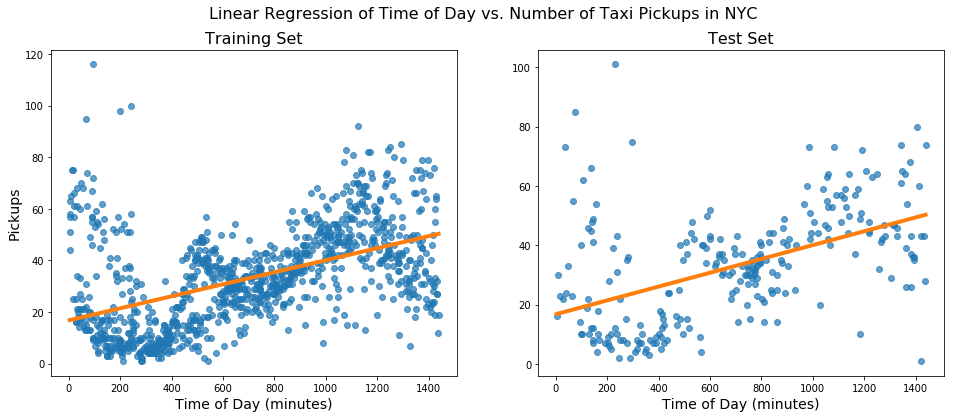

In [269]:
## Code for your plot here

fig, axes = plt.subplots(1,2, figsize=(16,6))

x = np.linspace(np.min(x_train), np.max(x_train), 100)

axes[0].plot(x_train, y_train, 'o', label='data', alpha=0.7)
axes[1].plot(x_test, y_test, 'o', label='data', alpha=0.7)

axes[0].plot(x, beta0 + beta1 * x, linewidth=4)
axes[1].plot(x, beta0 + beta1 * x, linewidth=4)

axes[0].set_ylabel('Pickups', fontsize=14)

axes[0].set_xlabel('Time of Day (minutes)', fontsize=14)
axes[1].set_xlabel('Time of Day (minutes)', fontsize=14)

axes[0].set_title('Training Set', fontsize=16)
axes[1].set_title('Test Set', fontsize=16)

fig.suptitle('Linear Regression of Time of Day vs. Number of Taxi Pickups in NYC', fontsize=16)


**4.4**

In [98]:
## Code here

y_preds = CS109OLSModel.predict()

CS109r2score(y_train, y_preds)


0.24302603531893338

**4.5**

In [103]:
## Code here

print("(beta0, beta1) = (%f, %f)" %(beta0, beta1))

(beta0, beta1) = (16.750601, 0.023335)


<div class="exercise"><b> Question 5 </b></div>.

You may recall from lectures that OLS Linear Regression can be susceptible to outliers in the data.  We're going to look at a dataset that includes some outliers and get a sense for how that affects modeling data with Linear Regression.


**5.1**. We've provided you with two files `outliers_train.csv` and `outliers_test.csv` corresponding to training set and test set data.  What does a visual inspection of training set tell you about the existence of outliers in the data?

**5.2**. Choose `X` as your feature variable and `Y` as your response variable.  Use `statsmodel` to create a Linear Regression model on the training set data.  Store your model in the variable `OutlierOLSModel`.

**5.3**. You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?  

**5.4**  In CS109 we're strong believers that creating heuristic models is a great way to build intuition. In that spirit, construct an approximate algorithm to find the 3 outlier candidates in the training data by taking advantage of the Linear Regression residuals. Place your algorithm in the function `find_outliers_simple`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  The return value should be a list `outlier_indices` representing the indices of the outliers in the original datasets you passed in.  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeSimpleModel`.

**Hint:** 
    1. What measure might you use to compare the performance of different Linear Regression models?

**5.5** Create a figure with two subplots.  In one subplot include a visualization of the Linear Regression line from the full training set overlayed on the test set data in `outliers_test`.  In the other subplot include a visualization of the Linear Regression line from the training set data with outliers removed overlayed on the test set data in `outliers_test`.  Visually which model fits the test set data more closely?

**5.6**. Calculate the $R^2$ score for the `OutlierOLSModel` and the `OutlierFreeSimpleModel` on the test set data.  Which model produces a better $R^2$ score?

**5.7**. One potential problem with the brute force outlier detection approach in 5.3 and the heuristic algorithm constructed in 5.4 is that they assume prior knowledge of the number of outliers.  In general we can't expect to know ahead of time the number of outliers in our dataset.  Alter the algorithm you constructed in 5.4 to create a more general heuristic (i.e. one which doesn't presuppose the number of outliers) for finding outliers in your dataset.  Store your algorithm in the function `find_outliers_general`.  It should take the parameters `dataset_x` and `dataset_y` representing your features and response variable values (make sure your response variable is stored as a numpy column vector).  It can take additional parameters as long as they have default values set.  The return value should be the list `outlier_indices` representing the indices of the outliers in the original datasets you passed in (in the order that your algorithm found them).  Remove the outliers that your algorithm identified, use `statsmodels` to create a Linear Regression model on the remaining training set data, and store your model in the variable `OutlierFreeGeneralModel`.

**Hints**:
   1. How many outliers should you try to identify in each step? (i.e. is there any reason not to try to identify one outlier at a time)
   2. If you plotted an $R^2$ score for each step the algorithm, what might that plot tell you about stopping conditions?
   3. As mentioned earlier we don't know ahead of time how many outliers to expect in the dataset or know mathematically  how we'd define a point as an outlier.  For this general algorithm, whatever measure you use to determine a point's impact on the Linear Regression model (e.g. difference in R^2, size of the residual or maybe some other measure) you may want to determine a tolerance level for that measure at every step below which your algorithm stops looking for outliers.
   4. You may also consider the maximum possible number of outliers it's reasonable for a dataset of size $n$ to have and use that as a cap for the total number of outliers identified (i.e. would it reasonable to expect all but one point in the dataset to be an outlier?)
    
**5.8**. Run your algorithm in 5.7 on the training set data.  

   1. What outliers does it identify?
   2. How do those outliers compare to the outliers you found in 5.4?
   3. How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?

### Answers

**5.1**

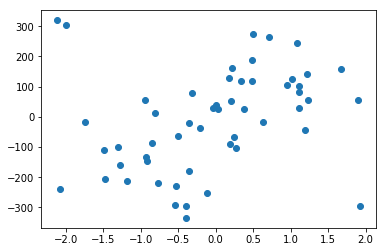

In [120]:
# load outliers_train and outliers_test
outliers_train = pd.read_csv("outliers_train.csv")
outliers_test = pd.read_csv("outliers_test.csv")

plt.scatter(outliers_train.X, outliers_train.Y)

*What does a visual inspection of training set tell you about the existence of outliers in the data?*
  
    It appears that there are three major outliers in the data.

**5.2**

In [193]:
## Code here

# create the X matrix by appending a column of ones to x_train
X = sm.add_constant(outliers_train.X)
Y = outliers_train.Y

# build the OLS model (ordinary least squares) from the training data
out_regr_sm = sm.OLS(Y, X)

# do the fit and save regression info (parameters, etc)
OutlierOLSModel = out_regr_sm.fit()

# pull the beta parameters out from OLSModel
out_beta0_sm = OutlierOLSModel.params[0]
out_beta1_sm = OutlierOLSModel.params[1]

print("(beta0, beta1) = (%f, %f)" %(out_beta0_sm, out_beta1_sm))

(beta0, beta1) = (-9.506264, 47.355423)


**5.3**

*You're given the knowledge ahead of time that there are 3 outliers in the training set data.  The test set data doesn't have any outliers.  You want to remove the 3 outliers in order to get the optimal intercept and slope.  In the case that you're sure ahead of time of the existence and number (3) of outliers ahead of time, one potential brute force method to outlier detection might be to find the best Linear Regression model on all possible subsets of the training set data with 3 points removed.  Using this method, how many times will you have to calculate the Linear Regression coefficients on the training data?*
  
    Using this method, you would have to calculate the Regression coefficients 140,556 times because there are 53 * 52 * 51 = 140,556 ways you can select three points to remove from the data set.


**5.4**

In [253]:
## Code here

def find_outliers_simple(dataset_x, dataset_y):
    
    # check input array shapes
    if len(dataset_x.shape) < 2:
        dataset_x = dataset_x.values.reshape(dataset_x.shape[0], 1)
        
    if len(dataset_y.shape) < 2:
        dataset_y = dataset_y.values.reshape(dataset_y.shape[0], 1)
    
    # build the OLS model from input data
    m = sm.OLS(dataset_y, dataset_x)
    
    # fit and save regression info (parameters, etc)
    model = m.fit()
    
    # save residuals
    resids = model.resid
    
    # create list of indices of outliers (prior knowledge that there are 3 outliers)
    outliers_indices = [0, 1, 2]
    
    # save indices of the three greatest residuals in this OLS model
    for i in range(3, len(resids)):
        if abs(resids[i]) > abs(resids[outliers_indices[0]]):
            outliers_indices[0] = i
        elif abs(resids[i]) > abs(resids[outliers_indices[1]]):
            outliers_indices[1] = i
        elif abs(resids[i]) > abs(resids[outliers_indices[2]]):
            outliers_indices[2] = i
    
    # return indices of outliers
    return outliers_indices

# drop outliers from outliers_train data set
cleaned_train = outliers_train.drop(outliers_train.index[[find_outliers_simple(X,Y)]])

X_clean = sm.add_constant(cleaned_train.X)

# make model
m = sm.OLS(cleaned_train.Y, X_clean)
OutlierFreeSimpleModel = m.fit()

**5.5**

Visually, the model based on data without outliers (right) fits the the test set more closely then the model on the left does.


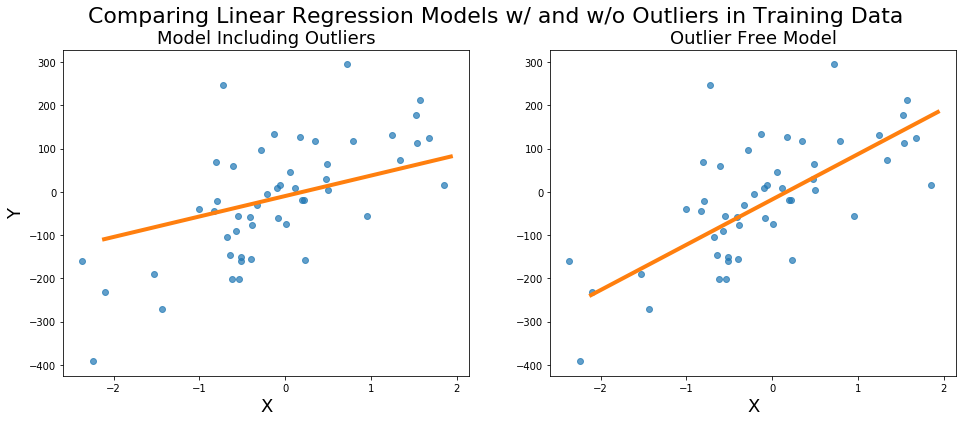

In [254]:
## Code for your plot here

fig, axes = plt.subplots(1,2, figsize=(16,6))

x = np.linspace(np.min(outliers_train.X), np.max(outliers_train.X), 53)

axes[0].plot(outliers_test.X, outliers_test.Y, 'o', label='data', alpha=0.7)
axes[1].plot(outliers_test.X, outliers_test.Y, 'o', label='data', alpha=0.7)

axes[0].plot(x, out_beta0_sm + out_beta1_sm * x, linewidth=4)
axes[1].plot(x, OutlierFreeSimpleModel.params[0] + OutlierFreeSimpleModel.params[1] * x, linewidth=4)

axes[0].set_ylabel('Y', fontsize=18)

axes[0].set_xlabel('X', fontsize=18)
axes[1].set_xlabel('X', fontsize=18)

axes[0].set_title('Model Including Outliers', fontsize=18)
axes[1].set_title('Outlier Free Model', fontsize=18)

fig.suptitle('Comparing Linear Regression Models w/ and w/o Outliers in Training Data', fontsize=22)

print('Visually, the model based on data without outliers (right) fits the the test set more closely then the model on the left does.')

**5.6**

In [266]:
## Code here
m.fit()
m.score(X_clean, outliers_test.Y)

ValueError: shapes (2,2) and (50,2) not aligned: 2 (dim 1) != 50 (dim 0)

**5.7**

In [ ]:
## Code here



**5.8**

In [ ]:
## Code here



1. *What outliers does it identify?*
    
    [Answer here]
    
2. *How do those outliers compare to the outliers you found in 5.4?*
    
    [Answer here]
    
3. *How does the general outlier-free Linear Regression model you created in 5.7 perform compared to the simple one in 5.4?*

    [Answer here]
    

---- 


In [1]:
from IPython.core.display import HTML
def css_styling(): styles = open("cs109.css", "r").read(); return HTML(styles)
css_styling()